## Mulitple Linear Regression
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Importing Libraries:
- Numpy
- Pandas
- Matplotlib
- Seaborn
- SciKit learn
- Stats models

In [92]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn and required packages from it
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Import statsmodels and required packages from it
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Understanding the Data

In [129]:
# Reading the data
bike_df = pd.read_csv('day.csv')

In [130]:
# Glancing the Bike dataframe using head command
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [131]:
# Checking the size of the Bike dataframe using shape command
bike_df.shape

(730, 16)

- Bike dataframe has 730 rows and 16 columns

In [132]:
# Checking out for detailed info about the dataset, Null counts, datatype of each column.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [133]:
# Checking for missing values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no Null values/Missing values in any of the Columns

In [134]:
# Checking central tendency, dispersion and shape of a Bike dataset distribution
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [135]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Cleaning and Manipulation

### Drop columns that are not useful for data analysis
- dteday: Dropping this column as the remaining features of date are alreeady present(Year, Month, Weekday).
- instant: It is the record index and hold no significance during analysis.
- cnt is sum of casual and registered columns and hence dropping them.

In [136]:
# Dropping dteday column
bike_df.drop(['dteday'], axis=1, inplace=True)

# Dropping instant column
bike_df.drop(['instant'], axis=1, inplace=True)

# Dropping casual column
bike_df.drop(['casual'], axis=1, inplace=True)

# Dropping registered column
bike_df.drop(['registered'], axis=1, inplace=True)

In [137]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Handling outliers
- Check for count of unique values and find the outliers by plotting boxplot

In [138]:
# Check the count of unique values of the columns
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

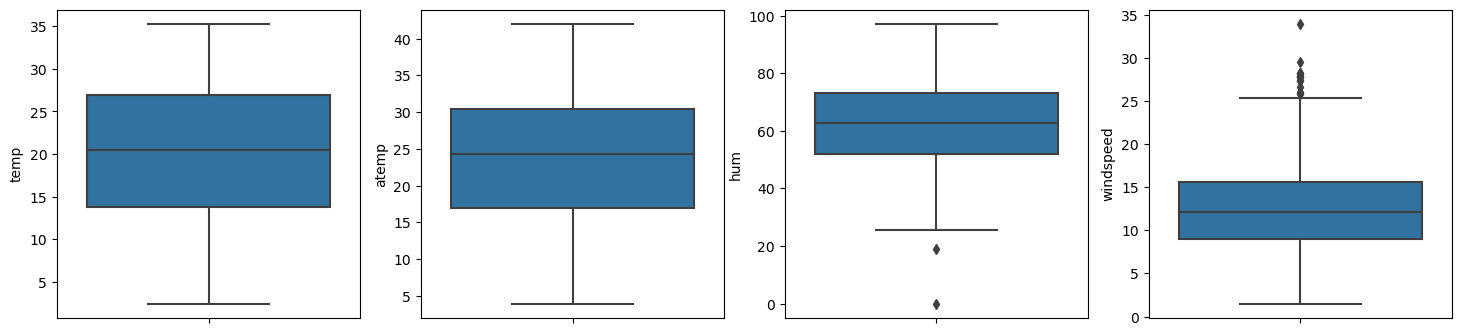

In [139]:
# Checking for outliers in temp, atemp, hum, windspeed
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
sns.boxplot(y='temp', data=bike_df)

plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=bike_df)

plt.subplot(1,4,3)
sns.boxplot(y='hum', data=bike_df)

plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=bike_df)

plt.show()

- Not severe outliers were present in temp, atemp, hum, windspeed

### Data Manipulation: Replacing below columns with meaningful data for categorical coulmns
- season
- mnth
- weekday
- weathersit

In [140]:
# season (1:spring, 2:summer, 3:fall, 4:winter)
bike_df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

# mnth (1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec')
bike_df['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)

# weekday (0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat')
bike_df['weekday'].replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}, inplace = True)

# weathersit (1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainy')
bike_df['weathersit'].replace({1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainy'}, inplace = True)

In [141]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Multi Linear Regression

### Understanding and Visualising the data
- Check for pairwise correlation for linear relationship
- Draw a heatmap to understand the correlation between numerical variables

In [142]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


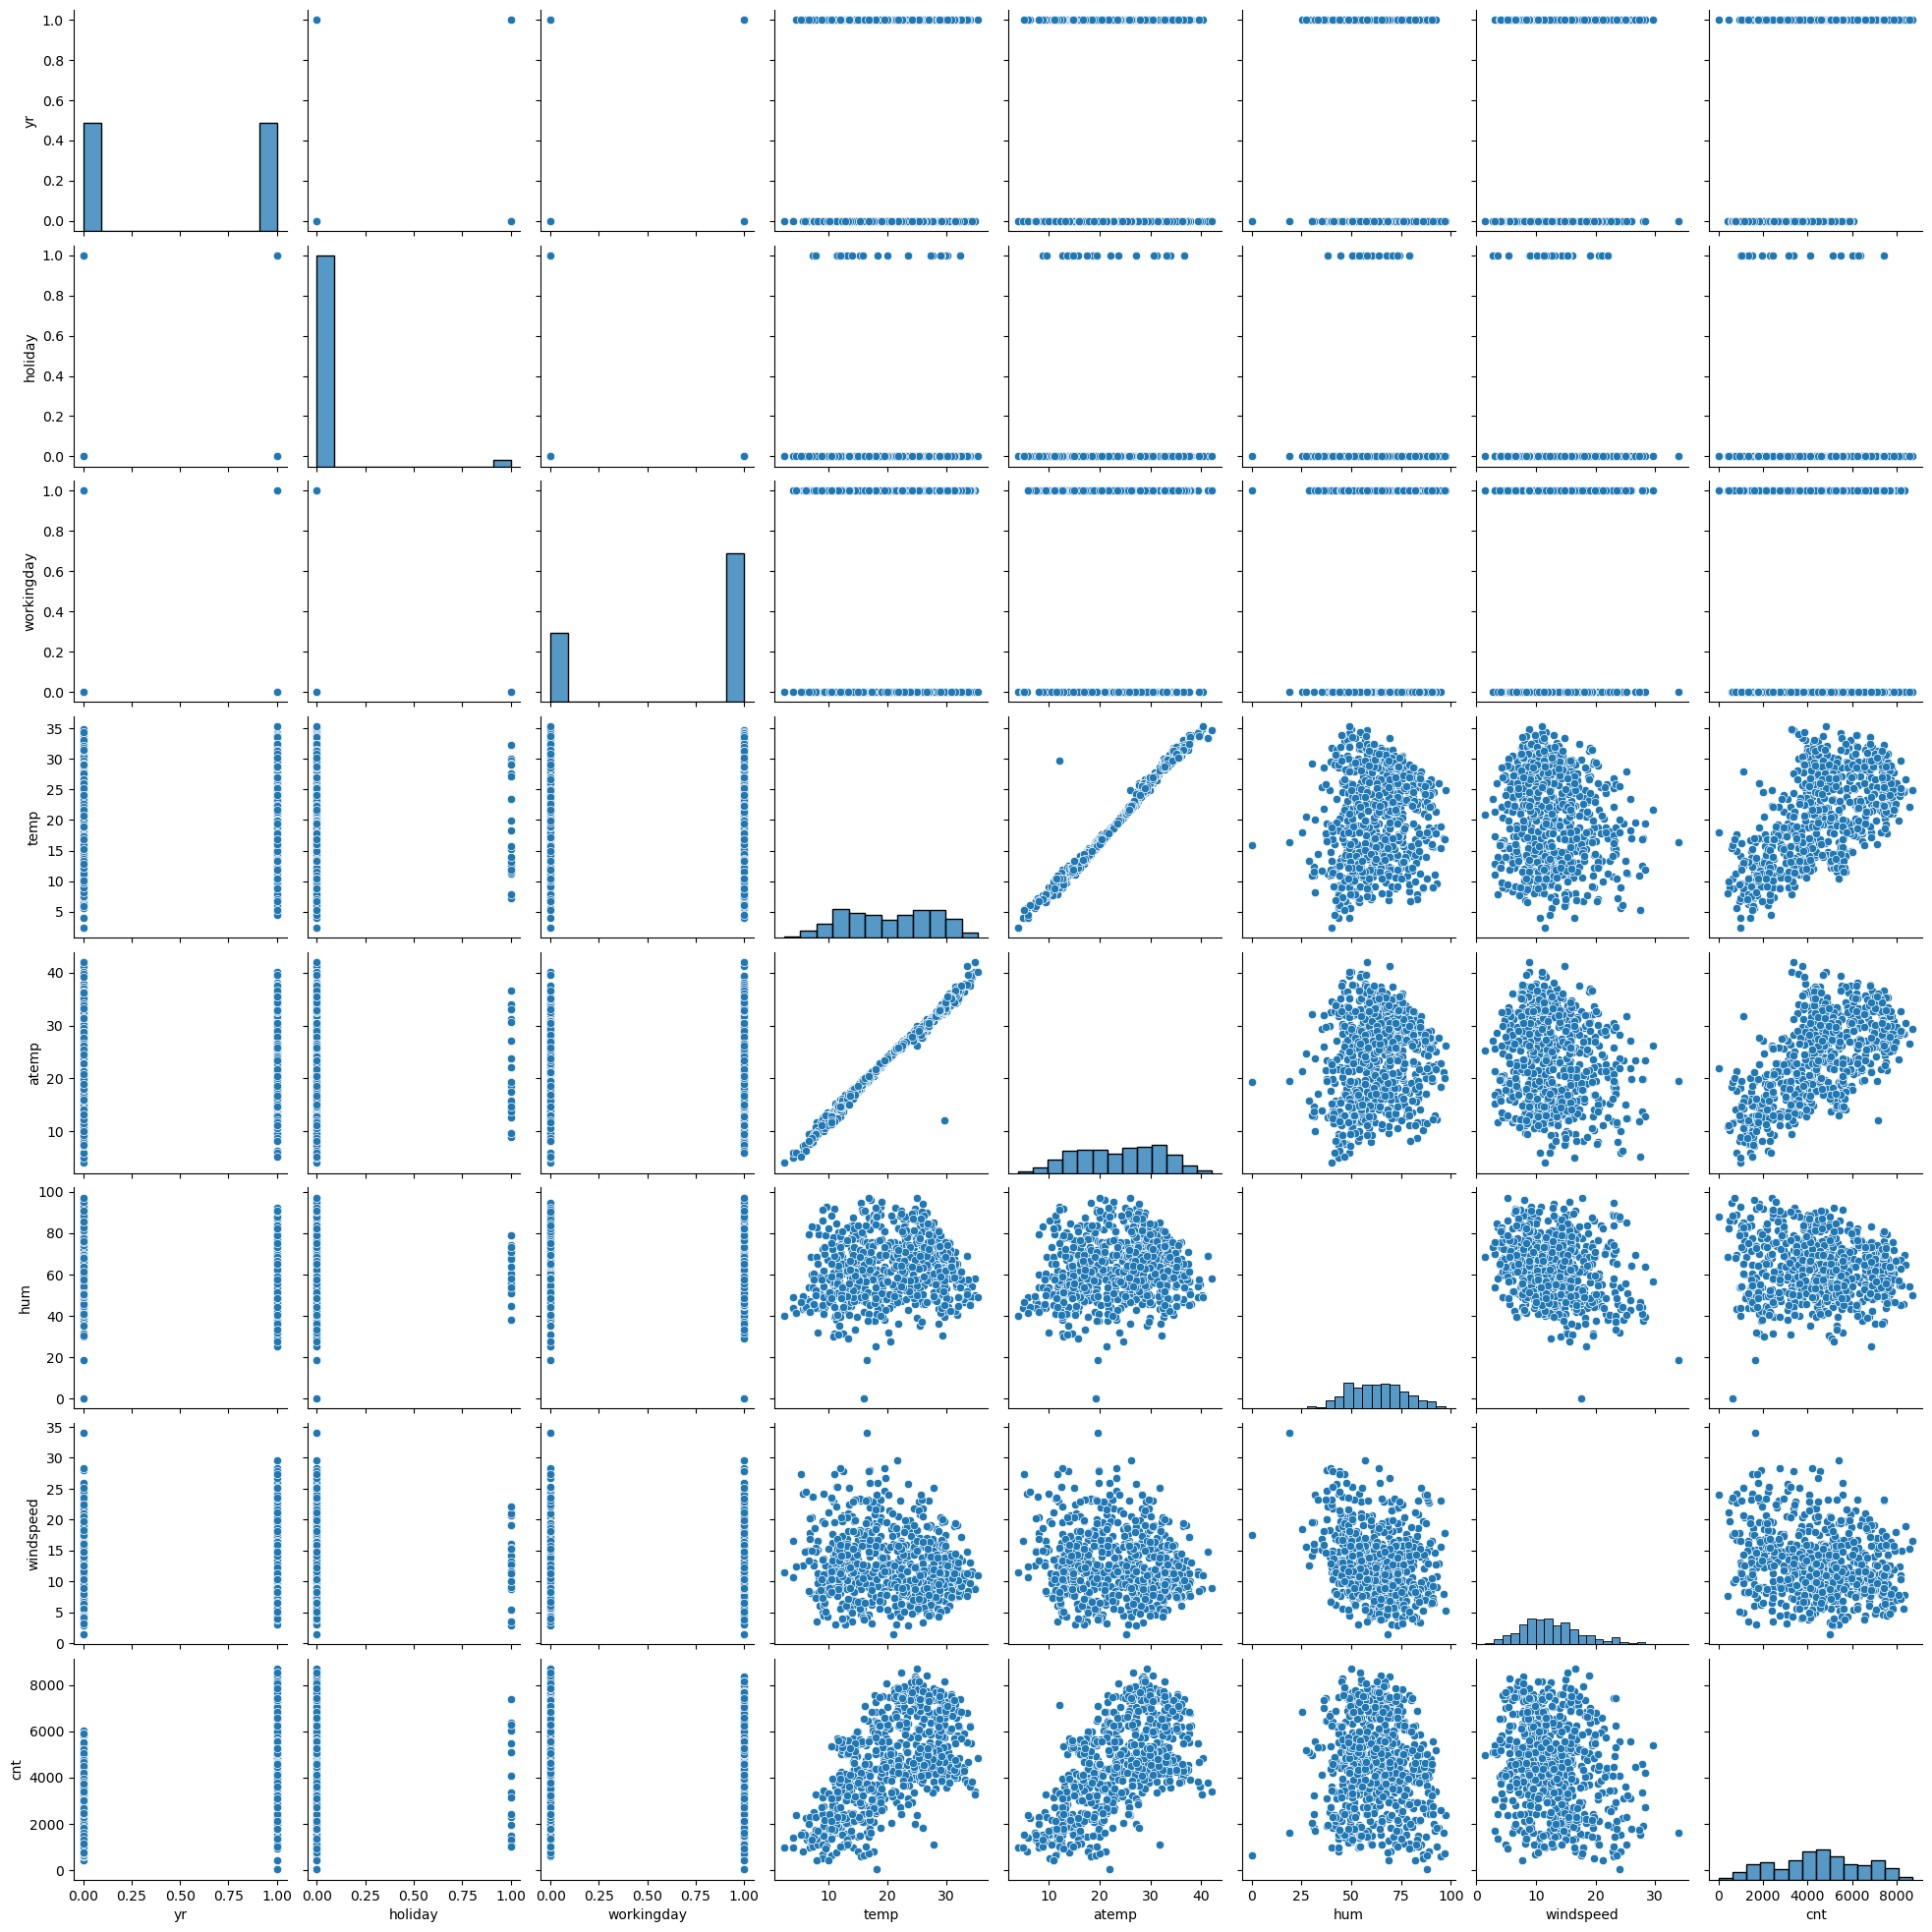

In [143]:
# Visualising Numeric Variables
sns.pairplot(bike_df)
plt.show()

- We can clearly see linear relation between cnt vs temp ann atemp

#### Visualising Categorical Variables
- Draw boxplot of categorical variables.

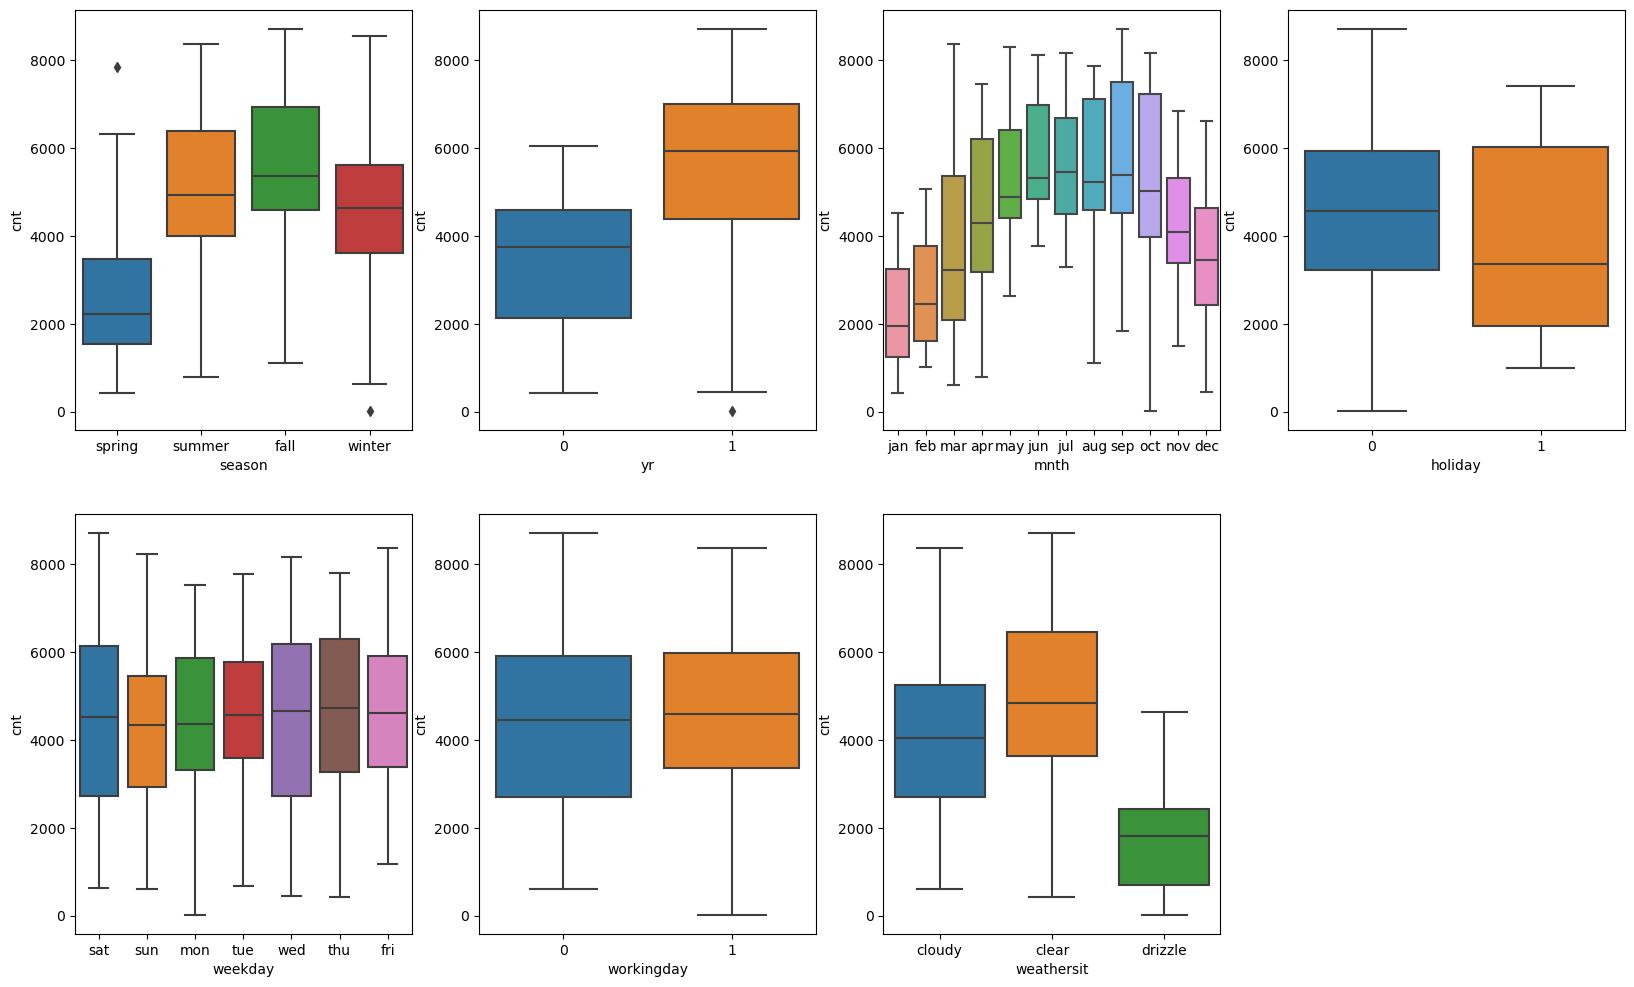

In [144]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=bike_df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=bike_df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=bike_df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike_df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)
plt.show()

- Fall season see higher influence on cnt variable
- Year 2019 sees higher cnt value

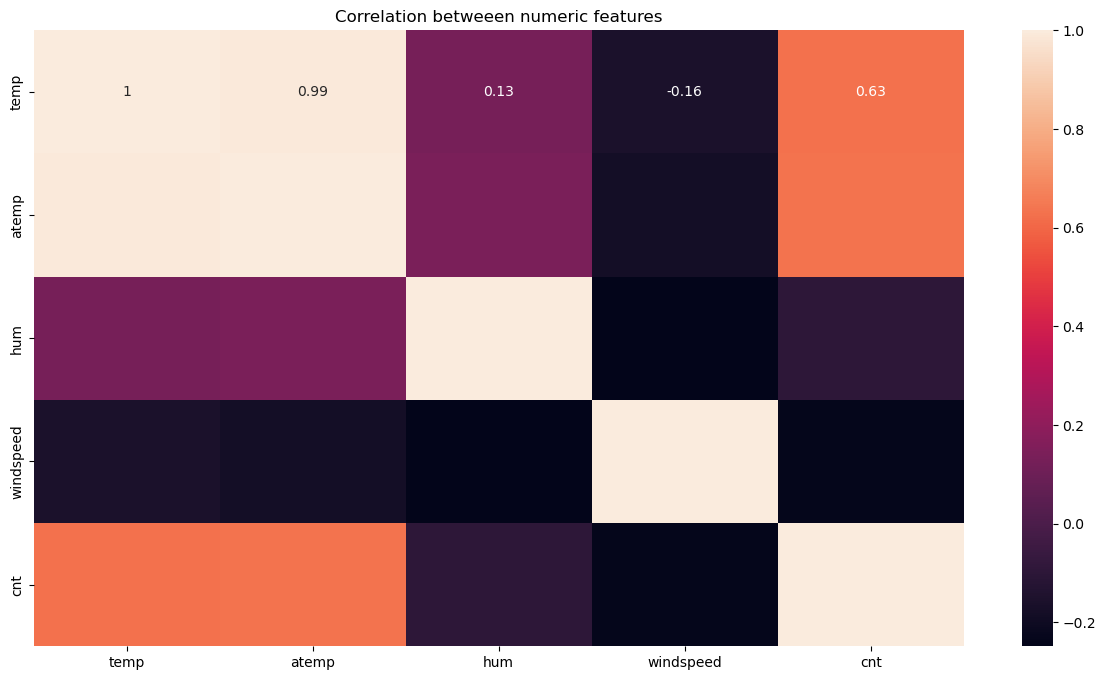

In [145]:
#Plotting heatmap with correlation among numeric variables
plt.figure(figsize=(15,8))
plt.title("Correlation betweeen numeric features")
sns.heatmap(bike_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot= True)
plt.show()

### Preparing the data for modelling
- Convert columns with binary values to 0/1 - All the columns with binary critera are already in binary format.
- Convert the categorical variables to dummy variables
- Splitting the Bike dataframe between Train and Test data (70:30)

In [146]:
# Get the dummy variables for the features 'season', 'mnth', 'weekday', 'weathersit'
bike_df = pd.get_dummies(data=bike_df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True, dtype=int)

In [149]:
# Splitting the Bike dataframe between Train and Test data (70:30)
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [155]:
print(bike_df.shape)
print(bike_df_train.shape)
print(bike_df_test.shape)

(730, 30)
(510, 30)
(219, 30)


### Training the model based on Train data
- Feature scaling of the Train data: MinMaxScaling
- Plot heatmap
- Dividing into X and Y sets for the model building
- Add constants
- Build model using RFE
- Write model_build function with columns as input
- Write model_vif function with columns as input
- Repeat building the model till the p-value, VIF, right R2 score are in place

In [158]:
# Feature scaling of the Train data: MinMaxScaling
scaler = MinMaxScaler()

In [161]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
bike_df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] = scaler.fit_transform(bike_df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

In [162]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_drizzle
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [163]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_drizzle
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


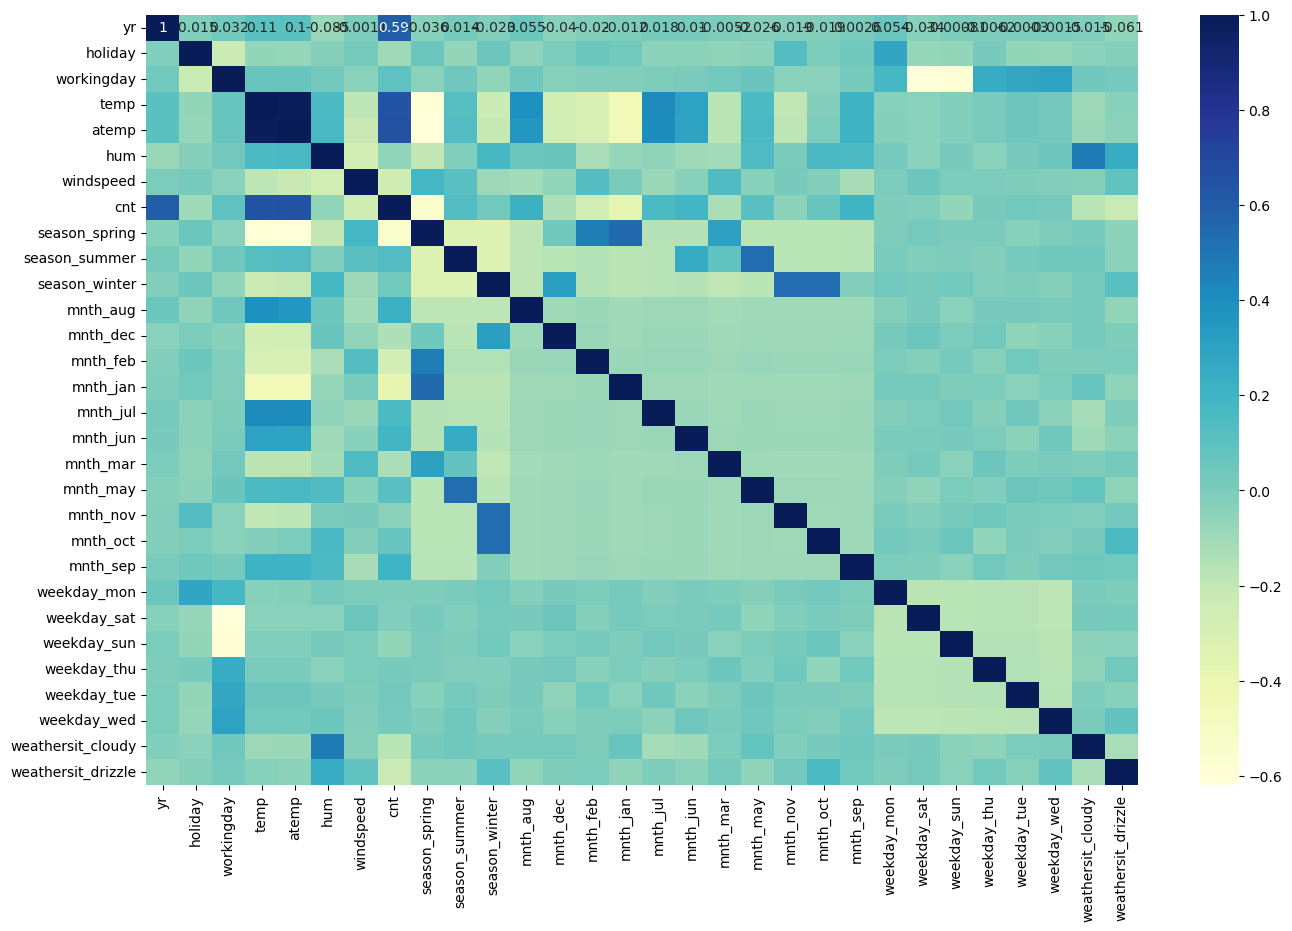

In [164]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As you might have noticed, `yr`, `temp`, `atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

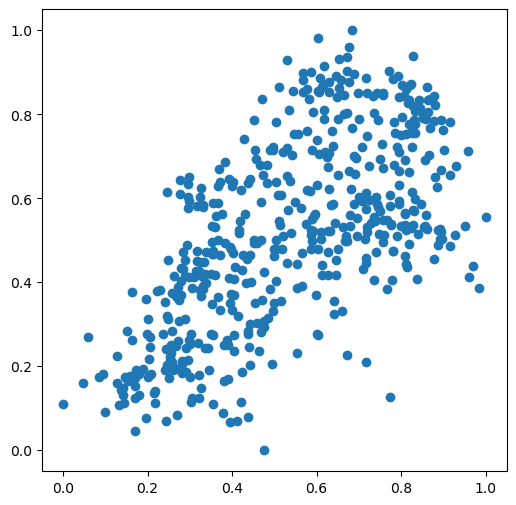

In [167]:
plt.figure(figsize=[6,6])
plt.scatter(bike_df_train.temp, bike_df_train.cnt)
plt.show()

In [168]:
# Dividing into X and Y sets for the model building
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

In [170]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


### Residual analysis of the train data
- Find residuals
- Plot the residuals using distplot

### Prediction and Evaluation on the test set
- Feature scaling of the Test data: MinMaxScaling
- Add constants
- Drop variables that are dropped while building the model
- Predict the y values of the test data
- Evaluate the R2-score of the test data